In [13]:
# 1. Thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# 2. Tải và xử lý dữ liệu
# Download dataset từ: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
df = pd.read_csv('DailyDelhiClimateTrain.csv')
data = df[['meantemp']].values.astype('float32')

# Chuẩn hóa dữ liệu về khoảng [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# 3. Tạo dữ liệu chuỗi thời gian
def create_sequences(data, seq_length=30):
    X = []
    y = []
    for i in range(len(data)-seq_length-1):
        X.append(data[i:(i+seq_length)])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 30
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Chia tập train-test
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [14]:
# 4. Xây dựng mô hình
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(time_steps, features)),  # Thay LSTM bằng SimpleRNN
    Dropout(0.2),
    SimpleRNN(32),  # Bỏ return_sequences=False vì mặc định đã là False
    Dense(1)
])

model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mae'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 30, 64)            4224      
                                                                 
 dropout_1 (Dropout)         (None, 30, 64)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7361 (28.75 KB)
Trainable params: 7361 (28.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# 5. Huấn luyện
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/100
33/33 [==============================] - 1s 12ms/step - loss: 0.0782 - mae: 0.1976 - val_loss: 0.0075 - val_mae: 0.0713
Epoch 2/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0118 - mae: 0.0843 - val_loss: 0.0055 - val_mae: 0.0606
Epoch 3/100
33/33 [==============================] - 0s 7ms/step - loss: 0.0084 - mae: 0.0720 - val_loss: 0.0038 - val_mae: 0.0497
Epoch 4/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0075 - mae: 0.0673 - val_loss: 0.0032 - val_mae: 0.0464
Epoch 5/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0071 - mae: 0.0653 - val_loss: 0.0028 - val_mae: 0.0415
Epoch 6/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0054 - mae: 0.0583 - val_loss: 0.0029 - val_mae: 0.0428
Epoch 7/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0048 - mae: 0.0541 - val_loss: 0.0026 - val_mae: 0.0407
Epoch 8/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0047 - 

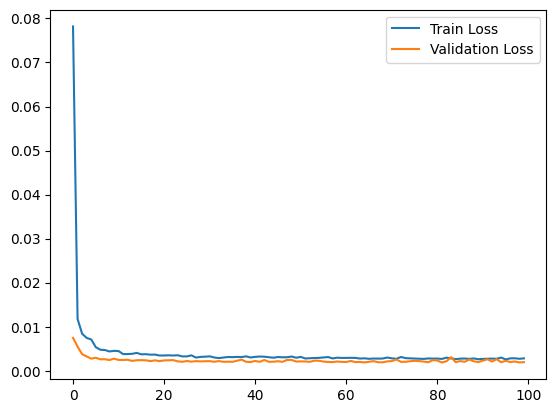

9/9 [==============================] - 0s 2ms/step


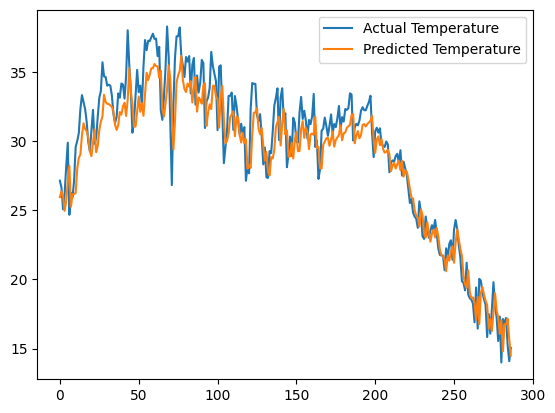

In [16]:
# 6. Đánh giá
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# 7. Dự đoán
test_pred = model.predict(X_test)
test_pred = scaler.inverse_transform(test_pred)
y_test_actual = scaler.inverse_transform(y_test)

plt.plot(y_test_actual, label='Actual Temperature')
plt.plot(test_pred, label='Predicted Temperature')
plt.legend()
plt.show()